<a href="https://colab.research.google.com/github/sujatabhandari/Practice/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sujata Bhandari**
**CMPS 335**

Final Project

Develop a predictive model for the Kaggle Titanic competition. You can look at a sample solution on Google Drive.

Your solution should include cross-validation to determine the best value for your hyperparameter(s), e.g. depth limit or cost complexity.

Your solution should also include some preprocessing of the input to clean it up and perhaps highlight some important factors. See other solutions on Kaggle for examples. Be sure to cite any ideas that you implement (e.g. link to the Kaggle code where you got the idea).

Develop your solution on Google Drive and produce a output file for submission to Kaggle. Include the results of your submission in a text cell on your notebook.

**I took some inspirations from the following notebook:**

Comprehensive Beginner’s Guide to Kaggle & The Titanic Survival Prediction Competition(https://towardsdatascience.com/comprehensive-beginners-guide-to-kaggle-titanic-survival-prediction-competition-solution-21c5be2cec2c)

https://www.kaggle.com/vinothan/titanic-model-with-90-accuracy
https://www.kaggle.com/chapagain/titanic-solution-a-beginner-s-guide?scriptVersionId=1473689

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import cross_validate

In [ ]:
# Note on Kaggle use the path '/kaggle/input/titanic/train.csv'
train = pd.read_csv('/content/drive/My Drive/HDS/Datasets/Kaggle Titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Note on Kaggle use the path '/kaggle/input/titanic/test.csv'
test = pd.read_csv('/content/drive/My Drive/HDS/Datasets/Kaggle Titanic/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**The data has been split up in two groups: training set and the test set. For training set we will look into the "features" like class, gender. For testing set we will use a model that we trained to see if the passenger survived sinking or not.**

In [ ]:
#To check how many missing data are there on the training data
train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [ ]:
#To check how many missing data are there on the testing data
test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

Looking at the results we can see that on both training and testing data, column cabin, column age and column embarked with their missing values.

**Describing Training Dataset**

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [ ]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


**It can be seen that the higher class passengers have better chances of survival.**

In [ ]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [ ]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


**It can be seen that females have higher chances of survival.**

In [ ]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
train.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [ ]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


**It can be seen that the embarkation 'C' has highest chances of survival.**

In [ ]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [ ]:
train.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [ ]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
#Value counts the Pclass column
train['Pclass'].value_counts(dropna = False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

**Data Preprocessing**





In [ ]:
# Drop cabin
drop_column = ['Cabin']
train.drop(drop_column, axis=1, inplace = True)
test.drop(drop_column,axis=1,inplace=True)


In [ ]:
#Drop Name 
drop_column = ['Name']
train.drop(drop_column, axis=1, inplace = True)
test.drop(drop_column,axis=1,inplace=True)

In [ ]:
#Drop Ticket
drop_column = ['Ticket']
train.drop(drop_column, axis=1, inplace = True)
test.drop(drop_column,axis=1,inplace=True)

In [ ]:
#Drop SibSp
drop_column = ['SibSp']
train.drop(drop_column, axis=1, inplace = True)
test.drop(drop_column,axis=1,inplace=True)

In [ ]:
# Fill missing value in Age with mean
train['Age'].fillna(train['Age'].dropna().mean(), inplace = True)

In [ ]:
# The age column has missing values
train["Age"].isnull().any()

False

In [ ]:
# Fill missing value in Embarked with mode
train['Embarked'].fillna(train['Embarked'].dropna().mode()[0], inplace = True)

In [ ]:
# The embarked column has missing values
train["Embarked"].isnull().any()

False

In [ ]:
# Fill missing value in Age with mean
test['Age'].fillna(test['Age'].dropna().mean(), inplace = True)

In [ ]:
# The age column has missing values
test["Age"].isnull().any()

False

In [ ]:
# Fill in the missing fares with the median
# Median is used as the fares are likely skewed
faremean = train["Fare"].median()
train["Fare"].fillna(value=faremean, inplace=True)
test["Fare"].fillna(value=faremean, inplace=True)

**Cleaning and Encoding**

In [ ]:
# Convert Sex into numerical values where 0 = male and 1 = female
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})



In [ ]:
# Assign ordinals into 5 age bands
train.loc[train['Age'] <= 16, 'Age'] = 0
train.loc[(train['Age'] > 16) & (train['Age'] <= 32), 'Age'] = 1
train.loc[(train['Age'] > 32) & (train['Age'] <= 48), 'Age'] = 2
train.loc[(train['Age'] > 48) & (train['Age'] <= 64), 'Age'] = 3
train.loc[train['Age'] > 64 , 'Age'] = 4

# Convert ordinal Age into integer
train['Age'] = train['Age'].astype('int')
train['Age'].dtype

dtype('int64')

In [ ]:
# Encode embarked feature
train = pd.get_dummies(train, columns = ['Embarked'], prefix = 'Em')

In [ ]:
# Assign ordinal into 4 fare bands
train.loc[train['Fare'] <= 15.6, 'Fare'] = 0
train.loc[(train['Fare'] > 15.6) & (train['Fare'] <= 31.19), 'Fare'] = 1
train.loc[(train['Fare'] > 31.19) & (train['Fare'] <= 46.79), 'Fare'] = 2
train.loc[train['Fare'] > 46.79, 'Fare'] = 3

# Convert ordinal Fare into integer
train['Fare'] = train['Fare'].astype('int')
train['Fare'].dtype

dtype('int64')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Parch,Fare,Em_C,Em_Q,Em_S
0,1,0,3,0,1,0,0,0,0,1
1,2,1,1,1,2,0,3,1,0,0
2,3,1,3,1,1,0,0,0,0,1
3,4,1,1,1,2,0,3,0,0,1
4,5,0,3,0,2,0,0,0,0,1


In [ ]:
# Convert Sex into numerical values where 0 = male and 1 = female
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

In [ ]:
# Assign ordinals into 5 age bands
test.loc[test['Age'] <= 16, 'Age'] = 0
test.loc[(test['Age'] > 16) & (test['Age'] <= 32), 'Age'] = 1
test.loc[(test['Age'] > 32) & (test['Age'] <= 48), 'Age'] = 2
test.loc[(test['Age'] > 48) & (test['Age'] <= 64), 'Age'] = 3
test.loc[test['Age'] > 64 , 'Age'] = 4

# Convert ordinal Age into integer
test['Age'] = test['Age'].astype('int')
test['Age'].dtype

dtype('int64')

In [ ]:
# Encode embarked feature
test = pd.get_dummies(test, columns = ['Embarked'], prefix = 'Em')

In [ ]:
# Assign ordinal into 4 fare bands
test.loc[test['Fare'] <= 15.6, 'Fare'] = 0
test.loc[(test['Fare'] > 15.6) & (test['Fare'] <= 31.19), 'Fare'] = 1
test.loc[(test['Fare'] > 31.19) & (test['Fare'] <= 46.79), 'Fare'] = 2
test.loc[test['Fare'] > 46.79, 'Fare'] = 3

# Convert ordinal Fare into integer
test['Fare'] = test['Fare'].astype('int')
test['Fare'].dtype

dtype('int64')

In [ ]:
test.head()

,PassengerId,Pclass,Sex,Age,Parch,Fare,Em_C,Em_Q,Em_S
0,892,3,0,2,0,0,0,1,0
1,893,3,1,2,0,0,0,0,1
2,894,2,0,3,0,0,0,1,0
3,895,3,0,1,0,0,0,0,1
4,896,3,1,1,1,0,0,0,1


**Modeling**

In [ ]:
# Pull out data subsets for training and testing
# Gender is deliberately left out
features = train.loc[:,["Pclass","Age","Parch","Fare"]]
targets = train.loc[:,"Survived"]
test_features = test.loc[:,["Pclass","Age","Parch","Fare"]]
features.head()

,Pclass,Age,Parch,Fare
0,3,1,0,0
1,1,2,0,3
2,3,1,0,0
3,1,2,0,3
4,3,2,0,0


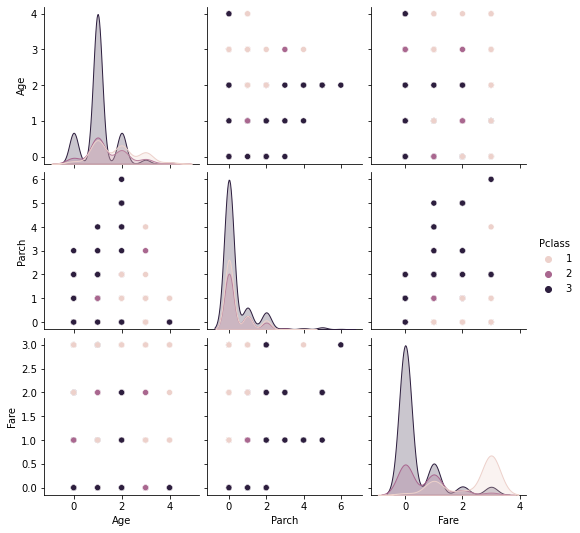

In [ ]:
# Try out a pairplot colored by class
import seaborn as sns
sns.pairplot(features, hue='Pclass')

**Random Forest**

In [ ]:
# Train up a random forest model with post pruning
forest = RandomForestClassifier(ccp_alpha=0.01, max_features=3)
forest.fit(features, targets)
scoring = ['accuracy','precision', 'recall', 'f1']
scores = cross_validate(forest, features, targets, scoring=scoring, return_train_score=True, cv=5)
results = pd.DataFrame(scores)
results.mean()

fit_time           0.177902
score_time         0.016958
test_accuracy      0.702680
train_accuracy     0.712970
test_precision     0.635571
train_precision    0.665600
test_recall        0.509250
train_recall       0.513847
test_f1            0.561625
train_f1           0.578674
dtype: float64

In [ ]:
# Train up a random forest model with more aggressive post pruning
forest = RandomForestClassifier(ccp_alpha=0.02, max_features=3)
forest.fit(features, targets)
scoring = ['accuracy','precision', 'recall', 'f1']
scores = cross_validate(forest, features, targets, scoring=scoring, return_train_score=True, cv=5)
results = pd.DataFrame(scores)
results.mean()

fit_time           0.174726
score_time         0.016474
test_accuracy      0.700433
train_accuracy     0.704553
test_precision     0.630460
train_precision    0.644125
test_recall        0.509037
train_recall       0.519770
test_f1            0.560063
train_f1           0.573816
dtype: float64

In [ ]:
# Train up a random forest model with less agressive post pruning
forest = RandomForestClassifier(ccp_alpha=0.005, max_features=3)
forest.fit(features, targets)
scoring = ['accuracy','precision', 'recall', 'f1']
scores = cross_validate(forest, features, targets, scoring=scoring, return_train_score=True, cv=5)
results = pd.DataFrame(scores)
results.mean()

fit_time           0.174731
score_time         0.018480
test_accuracy      0.703816
train_accuracy     0.728680
test_precision     0.657316
train_precision    0.704336
test_recall        0.471441
train_recall       0.510166
test_f1            0.544641
train_f1           0.588950
dtype: float64

In [ ]:
# Pick the original model
forest = RandomForestClassifier(ccp_alpha=0.01, max_features=3)
forest.fit(features, targets)
scoring = ['accuracy','precision', 'recall', 'f1']
scores = cross_validate(forest, features, targets, scoring=scoring, return_train_score=True, cv=5)
results = pd.DataFrame(scores)
results.mean()

fit_time           0.185702
score_time         0.017307
test_accuracy      0.700439
train_accuracy     0.712129
test_precision     0.628023
train_precision    0.666634
test_recall        0.506309
train_recall       0.514582
test_f1            0.556423
train_f1           0.578326
dtype: float64

In [ ]:
# Finally apply the model to predict values on the test set
fitmodel = forest.fit(features, targets)
preds = fitmodel.predict(test_features)
# Build a result set with the passengerid and the predicted survived column
result = pd.DataFrame(test["PassengerId"])
result["Survived"] = preds
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


**Decision Tree**

In [ ]:
# Train up a decision tree model with post pruning
tree = DecisionTreeClassifier(ccp_alpha=0.01, max_features=4)
tree.fit(features, targets)
scoring = ['accuracy','precision', 'recall', 'f1']
scores = cross_validate(tree, features, targets, scoring=scoring, return_train_score=True, cv=5)
results = pd.DataFrame(scores)
results.mean()

fit_time           0.004732
score_time         0.005104
test_accuracy      0.694828
train_accuracy     0.709886
test_precision     0.634474
train_precision    0.675559
test_recall        0.483333
train_recall       0.489653
test_f1            0.538901
train_f1           0.561384
dtype: float64

In [ ]:
# Train up a decision tree model with more aggressive post pruning
tree = DecisionTreeClassifier(ccp_alpha=0.02, max_features=4)
tree.fit(features, targets)
scoring = ['accuracy','precision', 'recall', 'f1']
scores = cross_validate(tree, features, targets, scoring=scoring, return_train_score=True, cv=5)
results = pd.DataFrame(scores)
results.mean()

fit_time           0.003934
score_time         0.005392
test_accuracy      0.660028
train_accuracy     0.673973
test_precision     0.531365
train_precision    0.598505
test_recall        0.582822
train_recall       0.583936
test_f1            0.542277
train_f1           0.572782
dtype: float64

In [ ]:
# Train up a decision tree model with less agressive post pruning
tree = DecisionTreeClassifier(ccp_alpha=0.005, max_features=4)
tree.fit(features, targets)
scoring = ['accuracy','precision', 'recall', 'f1']
scores = cross_validate(tree, features, targets, scoring=scoring, return_train_score=True, cv=5)
results = pd.DataFrame(scores)
results.mean()

fit_time           0.003345
score_time         0.006681
test_accuracy      0.688086
train_accuracy     0.712691
test_precision     0.638549
train_precision    0.691003
test_recall        0.453922
train_recall       0.488923
test_f1            0.514482
train_f1           0.558779
dtype: float64

In [ ]:
# Pick the original model
tree = DecisionTreeClassifier(ccp_alpha=0.01, max_features=4)
tree.fit(features, targets)
scoring = ['accuracy','precision', 'recall', 'f1']
scores = cross_validate(tree, features, targets, scoring=scoring, return_train_score=True, cv=5)
results = pd.DataFrame(scores)
results.mean()

fit_time           0.003978
score_time         0.005463
test_accuracy      0.694828
train_accuracy     0.709886
test_precision     0.634474
train_precision    0.675559
test_recall        0.483333
train_recall       0.489653
test_f1            0.538901
train_f1           0.561384
dtype: float64

In [ ]:
# Finally apply the model to predict values on the test set
fitmodel = tree.fit(features, targets)
preds = fitmodel.predict(test_features)
# Build a result set with the passengerid and the predicted survived column
result1 = pd.DataFrame(test["PassengerId"])
result1["Survived"] = preds
result1.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [ ]:
# Output to a csv
# Note on Kaggle also use 'result.csv' as your path
result1.to_csv('result1.csv', sep=",", index = False)

**I submitted my scores. My score was 0.66985**